In [1]:
#charger le fichier csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"Student_Performance.csv")

In [7]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Valeurs manqunates

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
df.isna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [16]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Valeurs dupliquées

In [23]:
(df[df.duplicated()])

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [56]:
condition = (df['Hours Studied'] == 9) & (df['Previous Scores'] == 52) & (df['Extracurricular Activities']=='No') & (df['Sleep Hours']==5)

In [57]:
df[condition]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
202,9,52,No,5,9,48.0
915,9,52,No,5,9,48.0


On remarque qu'il y a 127 lignes dupliquées , mais c'est pas un probleme car il peut y avoir deux etudiants ayant ls memes caracteristiques .

# Valeurs categrorielle --> valeurs numeriques

In [58]:
# rendre Yes : 1  et No : 0

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder()

In [61]:
extra_activ=encoder.fit_transform(df['Extracurricular Activities'])

In [72]:
extra_activ

array([1, 0, 1, ..., 1, 1, 0])

In [74]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [82]:
for i in encoder.classes_:
    print(i,' : ',encoder.transform([i]))

No  :  [0]
Yes  :  [1]


In [83]:
df['Extracurricular Activities']= extra_activ

In [84]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


# Afficher quelques statistiques

Afficher un diagramme circulaire pour voir le pourcentage des personnes pratiquants les activités extrascolaires et celles qui ne le font pas

In [86]:
import matplotlib.pyplot as plt

In [88]:
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [105]:
count = [df[df['Extracurricular Activities']==i].shape[0] for i in df['Extracurricular Activities'].unique()]

In [110]:
count

[4948, 5052]

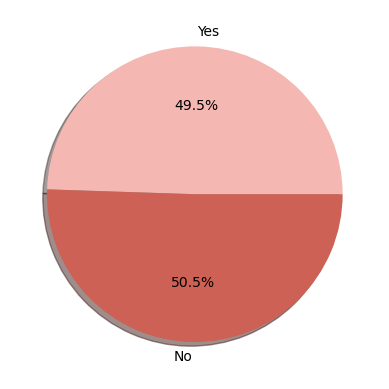

In [114]:
plt.pie(count,labels=['Yes','No'],autopct = "%1.1f%%",shadow = True,colors=['#f5b7b1','#cd6155'])
plt.show()

On remarque que le pourcentage d'etudiants pratiquants les activites extrascorlaire > ceux non

In [115]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0
